In [66]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#from dateutil import relativedelta

#### Hypothesis: assuming that people pay their gym membership every month they remain as a member for at least one day, meaning they will need to pay the membership on a pro-rata basis if they join or leave their membership status in the middle of the month 

In [299]:
df = pd.read_csv('subscriptionsdataFINAL.csv', index_col=False, parse_dates=[1,5],dayfirst=True)
df.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982


In [300]:
date_16 = datetime.strptime('2016-01-01','%Y-%d-%m')
date_16

df['Subs_mths_from16'] = (df['End Date'] - date_16)/np.timedelta64(1,'M')
df['Subs_mths_before16'] = (date_16 - df['Join Date'])/np.timedelta64(1,'M')
df['Subs_mths'] = (df['End Date'] - df['Join Date'])/np.timedelta64(1,'M')
df.iloc[1000:1010]

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths
1000,Lewisham,2015-07-01,DE,Female,Flexible,2015-09-01,1001,1977,-4.008296,6.045299,2.037003
1001,Hounslow,2017-11-01,C1,Female,Standard,2018-02-01,1002,1971,25.035422,-22.012772,3.022649
1002,Haringey,2015-07-01,C1,Male,Flexible,2015-08-01,1003,1985,-5.026797,6.045299,1.018501
1003,Newham,2017-06-01,C1,Female,Flexible,2017-06-01,1004,1986,16.985975,-16.985975,0.000000
1004,Greenwich,2016-11-01,C2,Male,Flexible,2017-01-01,1005,1983,12.024888,-10.020740,2.004148
1005,Camden,2017-12-01,C2,Male,Flexible,2018-02-01,1006,1987,25.035422,-22.998419,2.037003
1006,Greenwich,2009-07-01,B,Male,Flexible,2009-10-01,1007,1974,-75.007700,78.030350,3.022649
1007,Barking,2016-03-01,A,Female,Standard,2016-05-01,1008,1967,3.975441,-1.971293,2.004148
1008,Hounslow,2010-08-01,B,Female,Standard,2010-12-01,1009,1980,-61.011520,65.019816,4.008296
1009,Wandsworth,2015-12-01,C1,Female,Standard,2016-03-01,1010,1974,1.971293,1.018501,2.989794


In [301]:
only_before16_stan = (df.Subs_mths_from16 < 0) & (df['Subscription Type'] == 'Standard')
only_before16_fle = (df.Subs_mths_from16 < 0) & (df['Subscription Type'] == 'Flexible')
only_from16_stan = (df.Subs_mths_before16 <0) & (df['Subscription Type'] == 'Standard')
only_from16_fle = (df.Subs_mths_before16 <0) & (df['Subscription Type'] == 'Flexible')
cross_16_stan = (df.Subs_mths_before16 > 0) & (df.Subs_mths_from16 > 0) & (df['Subscription Type'] == 'Standard')
cross_16_fle = (df.Subs_mths_before16 > 0) & (df.Subs_mths_from16 > 0) & (df['Subscription Type'] == 'Flexible')

df['Revenue_type'] = np.select([only_before16_stan, only_before16_fle, only_from16_stan, only_from16_fle,cross_16_stan, cross_16_fle], [1,2,3,4,5,6]) 


In [302]:
df.iloc[1000:1010]

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths,Revenue_type
1000,Lewisham,2015-07-01,DE,Female,Flexible,2015-09-01,1001,1977,-4.008296,6.045299,2.037003,2
1001,Hounslow,2017-11-01,C1,Female,Standard,2018-02-01,1002,1971,25.035422,-22.012772,3.022649,3
1002,Haringey,2015-07-01,C1,Male,Flexible,2015-08-01,1003,1985,-5.026797,6.045299,1.018501,2
1003,Newham,2017-06-01,C1,Female,Flexible,2017-06-01,1004,1986,16.985975,-16.985975,0.000000,4
1004,Greenwich,2016-11-01,C2,Male,Flexible,2017-01-01,1005,1983,12.024888,-10.020740,2.004148,4
1005,Camden,2017-12-01,C2,Male,Flexible,2018-02-01,1006,1987,25.035422,-22.998419,2.037003,4
1006,Greenwich,2009-07-01,B,Male,Flexible,2009-10-01,1007,1974,-75.007700,78.030350,3.022649,2
1007,Barking,2016-03-01,A,Female,Standard,2016-05-01,1008,1967,3.975441,-1.971293,2.004148,3
1008,Hounslow,2010-08-01,B,Female,Standard,2010-12-01,1009,1980,-61.011520,65.019816,4.008296,1
1009,Wandsworth,2015-12-01,C1,Female,Standard,2016-03-01,1010,1974,1.971293,1.018501,2.989794,5


In [303]:
R1 = (df.Revenue_type == 1)
R2 = (df.Revenue_type == 2)
R3 = (df.Revenue_type == 3)
R4 = (df.Revenue_type == 4)
R5 = (df.Revenue_type == 5)
R6 = (df.Revenue_type == 6)

c1= df['Subs_mths'] * 20.99
c2 = df['Subs_mths'] * 25.99      
c3 = df['Subs_mths'] * 26.99
c4 = df['Subs_mths'] * 30.99 
c5= df['Subs_mths_before16'] * 20.99 + df['Subs_mths_from16'] * 26.99
c6= df['Subs_mths_before16'] * 25.99 + df['Subs_mths_from16'] * 30.99 

In [304]:
df['Revenue'] = np.select([R1,R2,R3,R4,R5,R6], [c1,c2,c3,c4,c5,c6]) 

In [305]:
df.iloc[1000:1010]

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths,Revenue_type,Revenue
1000,Lewisham,2015-07-01,DE,Female,Flexible,2015-09-01,1001,1977,-4.008296,6.045299,2.037003,2,52.941703
1001,Hounslow,2017-11-01,C1,Female,Standard,2018-02-01,1002,1971,25.035422,-22.012772,3.022649,3,81.581306
1002,Haringey,2015-07-01,C1,Male,Flexible,2015-08-01,1003,1985,-5.026797,6.045299,1.018501,2,26.470852
1003,Newham,2017-06-01,C1,Female,Flexible,2017-06-01,1004,1986,16.985975,-16.985975,0.000000,4,0.000000
1004,Greenwich,2016-11-01,C2,Male,Flexible,2017-01-01,1005,1983,12.024888,-10.020740,2.004148,4,62.108544
1005,Camden,2017-12-01,C2,Male,Flexible,2018-02-01,1006,1987,25.035422,-22.998419,2.037003,4,63.126717
1006,Greenwich,2009-07-01,B,Male,Flexible,2009-10-01,1007,1974,-75.007700,78.030350,3.022649,2,78.558656
1007,Barking,2016-03-01,A,Female,Standard,2016-05-01,1008,1967,3.975441,-1.971293,2.004148,3,54.091953
1008,Hounslow,2010-08-01,B,Female,Standard,2010-12-01,1009,1980,-61.011520,65.019816,4.008296,1,84.134130
1009,Wandsworth,2015-12-01,C1,Female,Standard,2016-03-01,1010,1974,1.971293,1.018501,2.989794,5,74.583544


In [394]:
# Revenue for 2015 Q4

start_2015Q4= datetime.strptime('2015-01-09','%Y-%d-%m')
end_2015Q4= datetime.strptime('2015-31-12','%Y-%d-%m')
df2015Q4= df[(df['Join Date'] < end_2015Q4)& (df['End Date'] >start_2015Q4)]

T1=(df2015Q4['Subscription Type'] == 'Standard')& (df2015Q4['Join Date'] < '2015-01-09') & (df2015Q4['End Date'] < '2016-01-01')
T2 = (df2015Q4['Subscription Type'] == 'Standard')& (df2015Q4['End Date'] > '2016-01-01')& (df2015Q4['Join Date'] >= '2015-01-09')
T3 = (df2015Q4['Subscription Type'] == 'Flexible')& (df2015Q4['Join Date'] < '2015-01-09') & (df2015Q4['End Date'] < '2016-01-01')
T4= (df2015Q4['Subscription Type'] == 'Flexible')& (df2015Q4['End Date'] > '2016-01-01')& (df2015Q4['Join Date'] >= '2015-01-09')
T5 = (df2015Q4['Subscription Type'] == 'Standard') & (df2015Q4['Join Date'] >= '2015-01-09')&(df2015Q4['End Date'] < '2016-01-01')
T6 = (df2015Q4['Subscription Type'] == 'Flexible') & (df2015Q4['Join Date'] >= '2015-01-09')&(df2015Q4['End Date'] < '2016-01-01')
T7 = (df2015Q4['Subscription Type'] == 'Standard') & (df2015Q4['Join Date'] < '2015-01-09')&(df2015Q4['End Date'] > '2016-01-01')
T8 = (df2015Q4['Subscription Type'] == 'Flexible') & (df2015Q4['Join Date'] < '2015-01-09')&(df2015Q4['End Date'] > '2016-01-01')
                                                             
c1= (df2015Q4['End Date'] - start_2015Q4)/np.timedelta64(1,'M') * 20.99
c2 = (end_2015Q4- df2015Q4['Join Date'])/np.timedelta64(1,'M') *20.99
c3=(df2015Q4['End Date'] - start_2015Q4)/np.timedelta64(1,'M') * 25.99
c4= (end_2015Q4- df2015Q4['Join Date'])/np.timedelta64(1,'M') *25.99
c5 = df2015Q4['Subs_mths'] * 20.99
c6= df2015Q4['Subs_mths'] * 25.99
c7 = 3* 20.99
c8 = 3* 25.99

df2015Q4['2015Q4'] = np.select([T1,T2,T3,T4,T5,T6, T7,T8], [c1,c2,c3,c4,c5,c6,c7,c8])
df2015Q4.head()

C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths,Revenue_type,Revenue,2015Q4
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,-1.018501,3.022649,2.004148,1,42.067065,42.067065
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,-1.018501,8.049447,7.030945,1,147.579540,147.579540
19,Southwark,2015-12-01,A,Male,Standard,2016-04-01,20,1980,2.989794,1.018501,4.008296,5,102.072897,20.688721
20,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,-3.022649,6.045299,3.022649,1,63.445410,63.445410
22,Tower Hamlets,2015-08-01,C2,Female,Standard,2015-12-01,23,1987,-1.018501,5.026797,4.008296,1,84.134130,84.134130


In [396]:
# Revenue for 2016 Q1

start_2016Q1= datetime.strptime('2016-01-01','%Y-%d-%m')
end_2016Q1= datetime.strptime('2016-01-04','%Y-%d-%m')
df2016Q1 = df[(df['Join Date'] < end_2016Q1)& (df['End Date'] > start_2016Q1)]

N1=(df2016Q1['Subscription Type'] == 'Standard')& (df2016Q1['Join Date'] < '2016-01-01') & (df2016Q1['End Date'] < '2016-01-04')
N2 = (df2016Q1['Subscription Type'] == 'Standard')& (df2016Q1['End Date'] > '2016-01-04')& (df2016Q1['Join Date'] >= '2016-01-01')
N3 = (df2016Q1['Subscription Type'] == 'Flexible')& (df2016Q1['Join Date'] < '2016-01-01') & (df2016Q1['End Date'] < '2016-01-04')
N4= (df2016Q1['Subscription Type'] == 'Flexible')& (df2016Q1['End Date'] > '2016-01-04')& (df2016Q1['Join Date'] >= '2016-01-01')
N5 = (df2016Q1['Subscription Type'] == 'Standard') & (df2016Q1['Join Date'] >= '2016-01-01')&(df2016Q1['End Date'] < '2016-01-04')
N6 = (df2016Q1['Subscription Type'] == 'Flexible') & (df2016Q1['Join Date'] >= '2016-01-01')&(df2016Q1['End Date'] < '2016-01-04')
N7 = (df2016Q1['Subscription Type'] == 'Standard') & (df2016Q1['Join Date'] < '2016-01-01')&(df2016Q1['End Date'] > '2016-01-04')
N8 = (df2016Q1['Subscription Type'] == 'Flexible') & (df2016Q1['Join Date'] < '2016-01-01')&(df2016Q1['End Date'] > '2016-01-04')

d1= (df2016Q1['End Date'] - start_2016Q1)/np.timedelta64(1,'M') * 26.99
d2 = (end_2016Q1- df2015Q4['Join Date'])/np.timedelta64(1,'M') *26.99
d3=(df2016Q1['End Date'] - start_2016Q1)/np.timedelta64(1,'M') * 30.99
d4= (end_2016Q1- df2015Q4['Join Date'])/np.timedelta64(1,'M') *30.99
d5 = df2016Q1['Subs_mths'] * 26.99
d6= df2016Q1['Subs_mths'] * 30.99
d7 = 3* 26.99
d8 = 3* 30.99

In [397]:
df2016Q1['2016Q1'] = np.select([N1,N2,N3,N4,N5,N6,N7,N8], [d1,d2,d3,d4,d5,d6,d7,d8])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [315]:
df2016Q1 = df[(df['Join Date'] < end_2016Q1)& (df['End Date'] > start_2016Q1)]
df2016Q1

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths,Revenue_type,Revenue
19,Southwark,2015-12-01,A,Male,Standard,2016-04-01,20,1980,2.989794,1.018501,4.008296,5,102.072897
40,Richmond upon Thames,2016-02-01,B,Male,Standard,2018-05-01,41,1982,27.959506,-1.018501,26.941005,3,727.137724
49,Sutton,2016-01-01,B,Male,Standard,2016-05-01,50,1992,3.975441,0.000000,3.975441,0,0.000000
79,Greenwich,2016-01-01,A,Male,Standard,2017-01-01,80,1990,12.024888,0.000000,12.024888,0,0.000000
112,Tower Hamlets,2016-01-01,C2,Male,Standard,2016-07-01,113,1993,5.979589,0.000000,5.979589,0,0.000000
134,Hounslow,2015-11-01,B,Male,Standard,2016-03-01,135,1986,1.971293,2.004148,3.975441,5,95.272264
157,Ealing,2016-03-01,C1,Male,Standard,2016-05-01,158,1974,3.975441,-1.971293,2.004148,3,54.091953
181,Waltham Forest,2016-02-01,C2,Male,Flexible,2016-04-01,182,1997,2.989794,-1.018501,1.971293,4,61.090371
184,Barking,2016-03-01,A,Female,Standard,2016-07-01,185,1986,5.979589,-1.971293,4.008296,3,108.183905
195,Greenwich,2016-03-01,B,Female,Standard,2016-12-01,196,1970,11.006386,-1.971293,9.035093,3,243.857163


In [288]:
# top 10 increase over 2015
index_list = df2015Q4.index.to_series()
dict_top = df2016Q1.to_dict()['2016Q1']
df2015Q4['2016Q1'] = index_list.map(dict_top)
df2015Q4['increase/decrease']= df2015Q4['2016Q1']/df2015Q4['2015Q4'] *100
df2015Q4.sort_values('increase/decrease',ascending=True)

C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Subs_mths_from16,Subs_mths_before16,Subs_mths,Revenue_type,Revenue,2016Q1,increase/decrease
3,Hounslow,2015-01-10,C1,Female,Standard,2015-01-12,4,1972,-11.630629,11.696339,0.065710,1,1.379248,NaN,NaN
4,Barnet,2015-01-05,C2,Male,Standard,2015-01-12,5,1982,-11.630629,11.860613,0.229984,1,4.827368,NaN,NaN
19,Southwark,2015-01-12,A,Male,Standard,2016-01-04,20,1980,0.098565,11.630629,11.729194,5,246.787162,246.787162,100.0
20,Camden,2015-01-07,A,Female,Standard,2015-01-10,21,1990,-11.696339,11.794903,0.098565,1,2.068872,NaN,NaN
22,Tower Hamlets,2015-01-08,C2,Female,Standard,2015-01-12,23,1987,-11.630629,11.762049,0.131420,1,2.758496,NaN,NaN
25,Richmond upon Thames,2015-01-06,B,Male,Standard,2015-01-11,26,1977,-11.663484,11.827758,0.164274,1,3.448120,NaN,NaN
76,Harrow,2015-01-10,B,Female,Standard,2016-01-01,77,1993,0.000000,11.696339,11.696339,0,0.000000,NaN,NaN
110,Southwark,2015-01-09,B,Male,Standard,2015-01-11,111,1993,-11.663484,11.729194,0.065710,1,1.379248,NaN,NaN
114,Wandsworth,2015-01-05,C1,Female,Standard,2015-01-10,115,1977,-11.696339,11.860613,0.164274,1,3.448120,NaN,NaN
134,Hounslow,2015-01-11,B,Male,Standard,2016-01-03,135,1986,0.065710,11.663484,11.729194,5,246.590033,246.590033,100.0


In [ ]:
df2015Q4.sort_values('increase/decrease',ascending=False)

In [330]:
club_total_revenue = df.groupby('Club').agg({'CustomerID':'count', 'Revenue': 'sum'}).rename(columns={'CustomerID':'Customer_count'})

In [331]:
# To calculate the number of A
a_count = df[df.Affluence == 'A'].groupby('Club').agg({'CustomerID':'count'}).rename(columns={'CustomerID':'A_count'})
a_count.sort_values('A_count',ascending=False)
dict1 = a_count.to_dict()['A_count']

In [332]:
# To calculate the number of B

b_count = df[df.Affluence == 'B'].groupby('Club').agg({'CustomerID':'count'}).rename(columns={'CustomerID':'B_count'})
dict2 = b_count.to_dict()['B_count']

In [333]:
# To calculate the number of c1
c1_count = df[df.Affluence == 'C1'].groupby('Club').agg({'CustomerID':'count'}).rename(columns={'CustomerID':'C1_count'})
dict3 = c1_count.to_dict()['C1_count']


In [334]:
# To calculate the number of c2
c2_count = df[df.Affluence == 'C2'].groupby('Club').agg({'CustomerID':'count'}).rename(columns={'CustomerID':'C2_count'})
dict4 = c2_count.to_dict()['C2_count']


In [335]:
# To calculate the number of DE
de_count = df[df.Affluence == 'DE'].groupby('Club').agg({'CustomerID':'count'}).rename(columns={'CustomerID':'DE_count'})
dict5 = de_count.to_dict()['DE_count']


In [336]:
# Adding up the join fee 
club_total_revenue['Club_revenue']=club_total_revenue['Revenue'] + club_total_revenue['Customer_count'] * 5
club_total_revenue['Percentage(%)'] = (club_total_revenue['Club_revenue']/club_total_revenue['Club_revenue'].sum())*100 


In [379]:
club_revenue_sorted=club_total_revenue.sort_values('Club_revenue',ascending = False)
club_revenue_sorted=club_revenue_sorted.reset_index()
club_revenue_sorted

,Club,Customer_count,Revenue,Club_revenue,Percentage(%)
0,Hounslow,49620,4.434286e+06,4.682386e+06,5.822788
1,Greenwich,48542,4.169628e+06,4.412338e+06,5.486970
2,Havering,42850,4.110006e+06,4.324256e+06,5.377436
3,Richmond upon Thames,42910,3.902528e+06,4.117078e+06,5.119799
4,Harrow,38683,3.796566e+06,3.989981e+06,4.961747
5,Islington,39273,3.530154e+06,3.726519e+06,4.634118
6,Lambeth,41357,3.447463e+06,3.654248e+06,4.544246
7,Barnet,38763,3.453635e+06,3.647450e+06,4.535793
8,Westminster,30068,3.225444e+06,3.375784e+06,4.197962
9,Tower Hamlets,35545,3.163159e+06,3.340884e+06,4.154562


In [372]:
club_revenue_sorted.to_csv('club_revenue_sorted.csv')

In [373]:
club_revenue_sorted1=pd.read_csv('club_revenue_sorted.csv',index_col=0)
club_revenue_sorted1

,Unnamed: 0,Customer_count,Revenue,Club_revenue,Percentage(%)
Club,,,,,
Hounslow,0,49620,4.434286e+06,4.682386e+06,5.822788
Greenwich,1,48542,4.169628e+06,4.412338e+06,5.486970
Havering,2,42850,4.110006e+06,4.324256e+06,5.377436
Richmond upon Thames,3,42910,3.902528e+06,4.117078e+06,5.119799
Harrow,4,38683,3.796566e+06,3.989981e+06,4.961747
Islington,5,39273,3.530154e+06,3.726519e+06,4.634118
Lambeth,6,41357,3.447463e+06,3.654248e+06,4.544246
Barnet,7,38763,3.453635e+06,3.647450e+06,4.535793
Westminster,8,30068,3.225444e+06,3.375784e+06,4.197962


#### Plot the bar chart for the revenues of the clubs

In [374]:
club_revenue=club_revenue_sorted1.drop(columns=['Customer_count','Revenue','Percentage(%)','Unnamed: 0'])

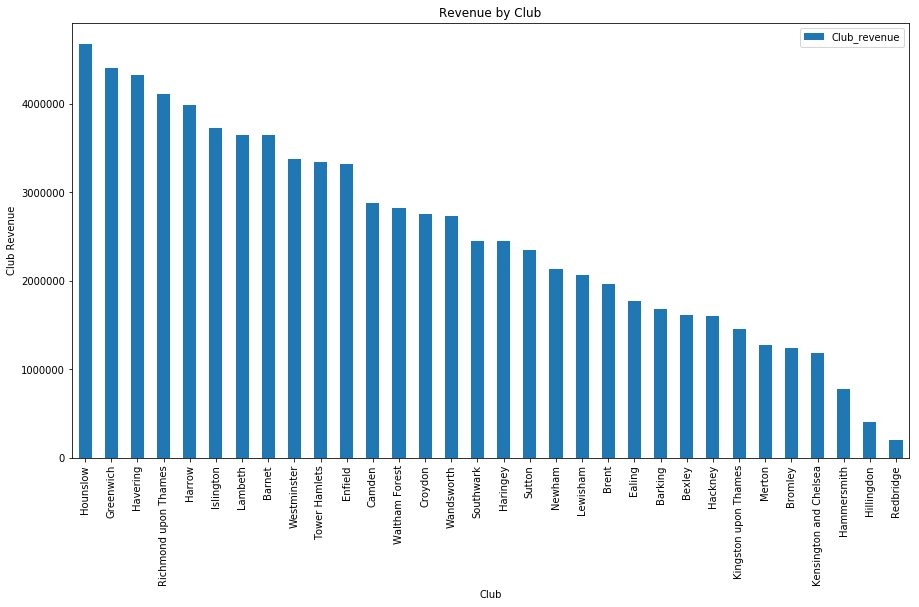

In [404]:
plt.rcParams['figure.figsize']= (15,8)
club_revenue.plot.bar()
plt.title('Revenue by Club')
plt.ylabel('Club Revenue')
plt.savefig('Revenue by Club.png')

#### Mapping the income level for each borough
source: https://data.gov.uk/dataset/f0e9be9a-2b59-4b8f-9009-91ce69a9c397/focus-on-london-income-and-spending

In [376]:
Income_borough = pd.read_csv('London_borough_income.csv',index_col=0,sep=',')
Income_borough.head()

,Median
Borough,
Richmond upon Thames,42028.0
Kensington and Chelsea,39249.0
Wandsworth,38330.0
Kingston upon Thames,37787.0
Westminster,37398.0


In [377]:
Income_borough.sort_values('Median ',ascending=False)
dict = Income_borough.to_dict()['Median ']

In [380]:
club_list = pd.Series(list(club_revenue_sorted['Club']))
club_revenue_sorted['Income_level'] = club_list.map(dict)

club_revenue_sorted['Income_rank'] = [0 if i >= 33546 else 1 for i in club_revenue_sorted['Income_level']]
club_revenue_sorted.head()

,Club,Customer_count,Revenue,Club_revenue,Percentage(%),Income_level,Income_rank
0,Hounslow,49620,4.434286e+06,4.682386e+06,5.822788,33175.0,1
1,Greenwich,48542,4.169628e+06,4.412338e+06,5.486970,30650.0,1
2,Havering,42850,4.110006e+06,4.324256e+06,5.377436,33399.0,1
3,Richmond upon Thames,42910,3.902528e+06,4.117078e+06,5.119799,42028.0,0
4,Harrow,38683,3.796566e+06,3.989981e+06,4.961747,35377.0,0
5,Islington,39273,3.530154e+06,3.726519e+06,4.634118,31985.0,1
6,Lambeth,41357,3.447463e+06,3.654248e+06,4.544246,32321.0,1
7,Barnet,38763,3.453635e+06,3.647450e+06,4.535793,35680.0,0
8,Westminster,30068,3.225444e+06,3.375784e+06,4.197962,37398.0,0
9,Tower Hamlets,35545,3.163159e+06,3.340884e+06,4.154562,30777.0,1


In [381]:
club_list = pd.Series(list(club_revenue_sorted['Club']))
club_revenue_sorted['A_count'] = club_list.map(dict1)
club_revenue_sorted['B_count'] = club_list.map(dict2)
club_revenue_sorted['C1_count'] = club_list.map(dict3)
club_revenue_sorted['C2_count'] = club_list.map(dict4)
club_revenue_sorted['DE_count'] = club_list.map(dict5)
club_revenue_sorted.head()

,Club,Customer_count,Revenue,Club_revenue,Percentage(%),Income_level,Income_rank,A_count,B_count,C1_count,C2_count,DE_count
0,Hounslow,49620,4.434286e+06,4.682386e+06,5.822788,33175.0,1,8783,19270,14764,6069,734
1,Greenwich,48542,4.169628e+06,4.412338e+06,5.486970,30650.0,1,8183,21211,13143,5335,670
2,Havering,42850,4.110006e+06,4.324256e+06,5.377436,33399.0,1,7136,19147,11409,4587,571
3,Richmond upon Thames,42910,3.902528e+06,4.117078e+06,5.119799,42028.0,0,7085,19778,10976,4534,537
4,Harrow,38683,3.796566e+06,3.989981e+06,4.961747,35377.0,0,6416,17384,10154,4183,546
5,Islington,39273,3.530154e+06,3.726519e+06,4.634118,31985.0,1,6602,17415,10480,4249,527
6,Lambeth,41357,3.447463e+06,3.654248e+06,4.544246,32321.0,1,7244,16537,12064,4847,665
7,Barnet,38763,3.453635e+06,3.647450e+06,4.535793,35680.0,0,6640,16191,11026,4363,543
8,Westminster,30068,3.225444e+06,3.375784e+06,4.197962,37398.0,0,4800,14305,7508,3080,375
9,Tower Hamlets,35545,3.163159e+06,3.340884e+06,4.154562,30777.0,1,6313,13792,10627,4265,548


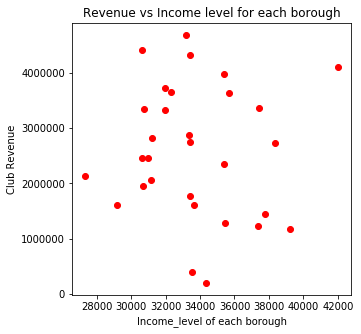

In [405]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['Income_level'])
    
plt.scatter(x,y,color='red')
plt.ylabel('Club Revenue')
plt.xlabel('Income_level of each borough')
plt.title('Revenue vs Income level for each borough')
plt.savefig('Revenue vs Income.png')

Apparently there is no clear relationship between income level and revenue of the gym

(1) Relationship with number of A

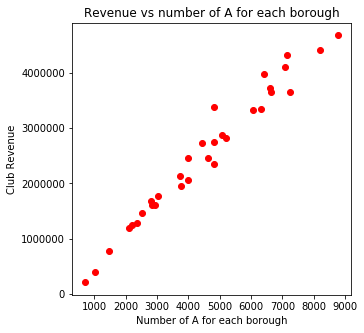

In [406]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['A_count'])
    
plt.scatter(x,y,color='red')
plt.ylabel('Club Revenue')
plt.xlabel('Number of A for each borough')
plt.title('Revenue vs number of A for each borough')
plt.savefig('Revenue vs number of A.png')

We can see there is a positive relationship between the number of A in the club and the club revenue

(2) Relationship with number of B

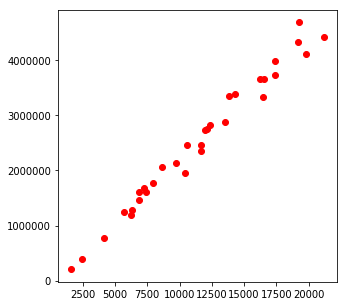

In [383]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['B_count'])
    
plt.scatter(x,y,color='red')

(3) Relationship with number of C1

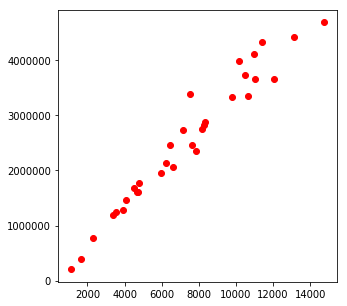

In [384]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['C1_count'])
    
plt.scatter(x,y,color='red')

(4) Relationship with number of C2

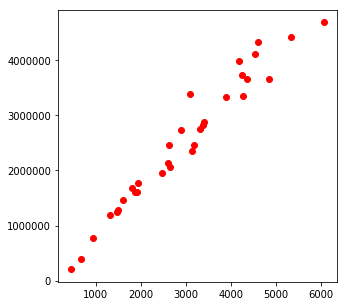

In [385]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['C2_count'])
    
plt.scatter(x,y,color='red')

(5) Relationship with number of DE

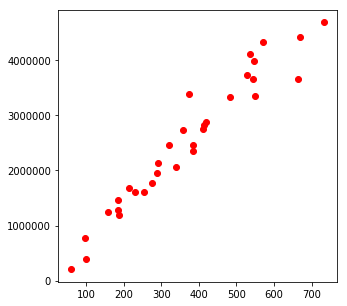

In [386]:
plt.figure(figsize=(5,5))
#plt.title('')

y= list(club_revenue_sorted['Club_revenue'])
x= list(club_revenue_sorted['DE_count'])
    
plt.scatter(x,y,color='red')